In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.3'

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16194668142273920503
]


In [3]:
from keras.datasets import mnist

(train_images0, train_labels0), (test_images0, test_labels0) = mnist.load_data()

In [4]:
train_images0.shape

(60000, 28, 28)

In [5]:
train_labels0

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

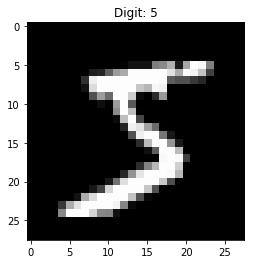

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_images0[0], cmap='gray')
plt.title("Digit: {}".format(train_labels0[0]))
plt.show()

In [8]:
test_images0.shape

(10000, 28, 28)

In [24]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape=(28 * 28,)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [26]:
train_images = train_images0.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images0.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [27]:
from keras.utils import to_categorical
train_labels_cat = to_categorical(train_labels0)
test_labels_cat = to_categorical(test_labels0)

In [28]:
model.fit(train_images, train_labels_cat, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 21us/step - loss: 0.6139 - acc: 0.8487
Epoch 2/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.3316 - acc: 0.9084
Epoch 3/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.3021 - acc: 0.9159
Epoch 4/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.2885 - acc: 0.9190
Epoch 5/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.2802 - acc: 0.9220


In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 24us/step
test_acc: 0.9226
